In [3]:
import pandas as pd
import sqlite3
import plotly.express as px
import numpy as np

# Connecting to SQLite Database
conn = sqlite3.connect('lahman2016.sqlite')

In [4]:
query = '''select * from Teams 
inner join TeamsFranchises
on Teams.franchID == TeamsFranchises.franchID
where Teams.G >= 150 and TeamsFranchises.active == 'Y';
'''

# Creating dataframe from query.
Teams = conn.execute(query).fetchall()

In [5]:
col = [
'yearID', #         Year
'lgID', #           League
'teamID', #         Team
'franchID', #       Franchise (links to TeamsFranchise table)
'divID', #          Team's division
'Rank', #           Position in final standings
'G', #              Games played
'GHome', #          Games played at home
'W', #              Wins
'L', #              Losses
'DivWin', #         Division Winner (Y or N)
'WCWin', #          Wild Card Winner (Y or N)
'LgWin', #          League Champion(Y or N)
'WSWin', #          World Series Winner (Y or N)
'R', #              Runs scored
'AB', #             At bats
'H', #              Hits by batters
'2B', #             Doubles
'3B', #             Triples
'HR', #             Homeruns by batters
'BB', #             Walks by batters
'SO', #             Strikeouts by batters
'SB', #             Stolen bases
'CS', #             Caught stealing
'HBP', #            Batters hit by pitch
'SF', #             Sacrifice flies
'RA', #             Opponents runs scored
'ER', #             Earned runs allowed
'ERA', #            Earned run average
'CG', #             Complete games
'SHO', #            Shutouts
'SV', #             Saves
'IPOuts', #         Outs Pitched (innings pitched x 3)
'HA', #             Hits allowed
'HRA', #            Homeruns allowed
'BBA', #            Walks allowed
'SOA', #            Strikeouts by pitchers
'E', #              Errors
'DP', #             Double Plays
'FP', #             Fielding  percentage
'name', #           Team's full name
'park', #           Name of team's home ballpark
'attendance', #     Home attendance total
'BPF', #            Three-year park factor for batters
'PPF', #            Three-year park factor for pitchers
'teamIDBR', #       Team ID used by Baseball Reference website
'teamIDlahman45', # Team ID used in Lahman database version 4.5
'teamIDretro', #    Team ID used by Retrosheet
'franchID', #       Franchise ID
'franchName', #     Franchise name
'active', #         Whetehr team is currently active (Y or N)
'NAassoc' #         ID of National Association team franchise played as
]

In [16]:
df.dtypes

yearID           int64
lgID            object
teamID          object
divID           object
Rank             int64
G                int64
GHome          float64
W                int64
L                int64
R                int64
AB               int64
H                int64
2B               int64
3B               int64
HR               int64
BB               int64
SO             float64
SB               int64
CS             float64
HBP            float64
SF             float64
RA               int64
ER               int64
ERA            float64
CG               int64
SHO              int64
SV               int64
IPOuts           int64
HA               int64
HRA              int64
BBA              int64
SOA              int64
E                int64
DP             float64
FP             float64
name            object
park            object
attendance       int64
BPF              int64
PPF              int64
R_per_game     float64
RA_per_game    float64
dtype: object

In [35]:
df = pd.DataFrame(Teams, columns = col)
df = df.drop(
    columns = 
    {'teamIDBR',
    'teamIDlahman45',
    'teamIDretro',
    'franchID',
    'franchName',
    'active',
    'NAassoc',
    'DivWin',
    'WCWin',
    'LgWin',
    'WSWin',
     'L',
     'Rank'
    }
)

In [14]:
fig = px.scatter(
    df, 
    x = 'yearID', 
    y = 'W', 
    color = 'lgID'
)

fig.show()

In [15]:
df['R_per_game'] = df['R']/df['G']
df['RA_per_game'] = df['ER']/df['G']

fig = px.line(
    df.groupby(['yearID', 'lgID'])['R_per_game'].mean().reset_index(), 
    x = 'yearID', 
    y = 'R_per_game',
    color = 'lgID'
)

fig.show()

In [17]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=1, cols=2)

fig.add_trace(
    go.Scatter(x=df['R_per_game'], y=df['W'], mode = 'markers'),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=df['RA_per_game'], y=df['W'], mode = 'markers'),
    row=1, col=2
)

fig.update_layout(height=600, width=800, title_text="Side By Side Subplots")
fig.show()

In [36]:
dummy_col = [
    'lgID',
    'divID'
]


In [37]:
df = pd.get_dummies(df, columns = dummy_col, drop_first = True).set_index(['yearID', 'teamID', 'name', 'park'])

In [38]:
ws_corr = df.corr()[['W']]
ws_corr = ws_corr[abs(ws_corr['W']) >0.2]
ws_corr['abs(W)'] = abs(ws_corr['W'])
ws_corr.sort_values('abs(W)', ascending = False)

,W,abs(W)
W,1.000000,1.000000
R,0.552321,0.552321
RA,-0.519802,0.519802
SHO,0.428782,0.428782
ERA,-0.427955,0.427955
HA,-0.387600,0.387600
H,0.381575,0.381575
attendance,0.379688,0.379688
ER,-0.374317,0.374317
SV,0.372273,0.372273


In [39]:
df = df.fillna(0)

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [43]:
len(df.columns)

35

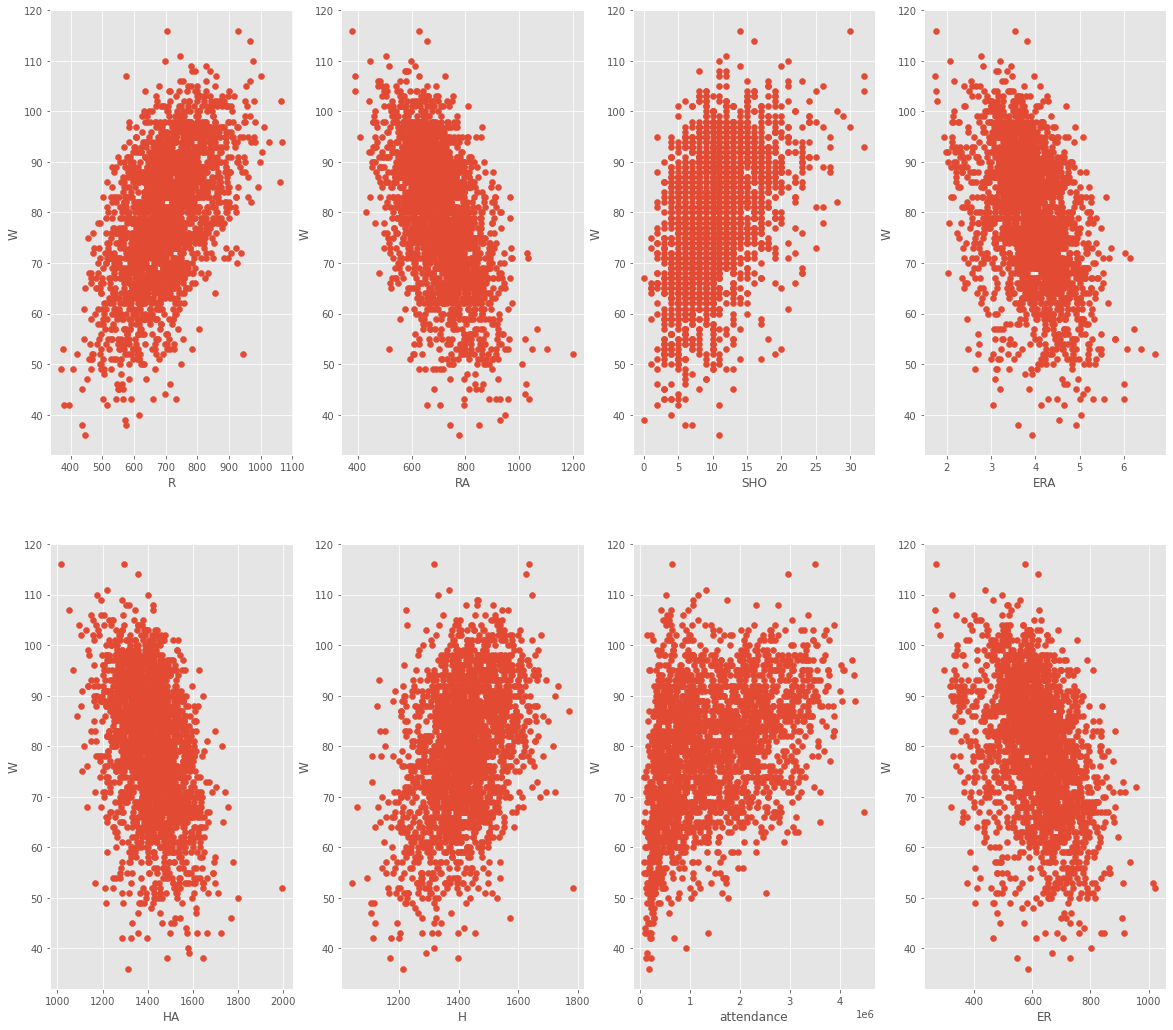

In [46]:
top_corr = [
    'R',
    'RA',
    'SHO',
    'ERA',
    'HA',
    'H',
    'attendance',
    'ER'
]

plt.style.use('ggplot')
fig = plt.figure(figsize = (20, 18))
 
for index, feature_name in enumerate(top_corr):
    ax = fig.add_subplot(2, 4, index + 1)
    ax.scatter(df[feature_name], df['W'])
    ax.set_ylabel('W', size = 12)
    ax.set_xlabel(feature_name, size = 12)
 
plt.show()

In [73]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, index = df.index, columns = df.columns)
df_scaled

,,,,G,GHome,W,R,AB,H,2B,3B,HR,BB,...,SOA,E,DP,FP,attendance,BPF,PPF,lgID_NL,divID_E,divID_W
yearID,teamID,name,park,,,,,,,,,,,,,,,,,,,,,
1961,LAA,Los Angeles Angels,Wrigley Field (LA),0.807827,0.405885,-0.707726,0.424878,0.055833,-0.789502,-0.576817,-1.140457,1.275497,1.999124,...,0.601882,0.698236,0.361058,-0.738186,-0.893181,2.391976,2.587052,-1.010992,-0.539103,-0.526251
1962,LAA,Los Angeles Angels,Dodger Stadium,0.807827,0.281420,0.519044,0.171708,0.491576,-0.355987,-0.271386,-0.489665,0.347502,1.058284,...,0.156663,0.404815,0.324707,-0.400179,-0.317368,-0.710316,-0.700794,-1.010992,-0.539103,-0.526251
1963,LAA,Los Angeles Angels,Dodger Stadium,0.542114,0.281420,-0.707726,-1.006506,0.532246,-0.346563,-0.794983,-0.339482,-0.402032,-0.775760,...,0.276679,0.197694,0.397408,-0.174841,-0.661488,-1.375093,-1.358363,-1.010992,-0.539103,-0.526251
1964,LAA,Los Angeles Angels,Dodger Stadium,0.807827,0.281420,0.212351,-1.522582,-0.304381,-1.109927,-1.274947,-0.890152,-0.277109,-0.489935,...,0.570910,-0.233807,0.869965,0.275835,-0.726015,-2.261463,-2.235122,-1.010992,-0.539103,-0.526251
1965,CAL,California Angels,Dodger Stadium,0.807827,0.156955,-0.324360,-1.688117,-0.350861,-1.279563,-0.969515,-0.439604,-0.455570,-0.835307,...,0.114077,-0.492708,0.179305,0.613841,-0.932363,-0.710316,-0.481604,-1.010992,-0.539103,-0.526251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012,WAS,Washington Nationals,Nationals Park,0.807827,0.281420,1.439120,0.298293,1.165526,0.501620,1.233956,-0.990274,1.364727,-0.406570,...,1.964637,-0.993249,-0.365953,1.064517,0.989382,-0.267132,0.175965,0.989128,1.854933,-0.526251
2013,WAS,Washington Nationals,Nationals Park,0.807827,0.281420,0.519044,-0.432005,0.125552,-0.469078,0.317661,-0.890152,0.775808,-0.585210,...,1.620077,-0.768869,0.070253,0.726510,1.289381,0.397645,0.175965,0.989128,1.854933,-0.526251
2014,WAS,Washington Nationals,Nationals Park,0.807827,0.281420,1.285774,-0.139886,0.741402,-0.110956,0.448560,-0.890152,0.615193,0.045987,...,1.821393,-0.889689,-0.184200,0.951848,1.211584,0.840830,0.395155,0.989128,1.854933,-0.526251


In [75]:
data_attributes = df_scaled.drop(columns = {'W'})
labels = df_scaled[['W']]

In [76]:
x_train, x_test, y_train, y_test = train_test_split(data_attributes, labels, test_size = 0.2, random_state = 47)

In [77]:
# Apply multiple Linear Regression Model
lreg = LinearRegression()
lreg.fit(x_train, y_train)
 
# Generate Prediction on test set
lreg_y_pred = lreg.predict(x_test)
 
# calculating Mean Squared Error (mse)
mean_squared_error = np.mean((lreg_y_pred - y_test)**2)
print("Mean squared Error on test set : ", mean_squared_error)
 


Mean squared Error on test set :  W    0.086536
dtype: float64


In [78]:
# Putting together the coefficient and their corresponding variable names
lreg_coefficient = pd.DataFrame()
lreg_coefficient["Columns"] = x_train.columns
lreg_coefficient["Columns Estimate"] = lreg.coef_[0].tolist()
lreg_coefficient.sort_values('Columns Estimate')

,Columns,Columns Estimate
15,ER,-0.885674
14,RA,-0.496675
25,E,-0.459492
27,FP,-0.387863
3,AB,-0.299895
30,PPF,-0.093064
21,HA,-0.040973
1,GHome,-0.032134
0,G,-0.028872
23,BBA,-0.025907


In [80]:
from sklearn.linear_model import Ridge
 
# Train the model
ridgeR = Ridge(alpha = 1)
ridgeR.fit(x_train, y_train)
y_pred = ridgeR.predict(x_test)
 
# calculate mean square error
mean_squared_error_ridge = np.mean((y_pred - y_test)**2)
print(mean_squared_error_ridge)
 
# get ridge coefficient and print them
ridge_coefficient = pd.DataFrame()
ridge_coefficient["Columns"]= x_train.columns
ridge_coefficient['Coefficient Estimate'] = ridgeR.coef_[0].tolist()
ridge_coefficient.sort_values('Coefficient Estimate')


W    0.086294
dtype: float64


,Columns,Coefficient Estimate
14,RA,-0.493920
25,E,-0.372231
27,FP,-0.297169
3,AB,-0.286730
15,ER,-0.284834
30,PPF,-0.083962
21,HA,-0.046275
1,GHome,-0.030708
0,G,-0.029941
23,BBA,-0.028320


In [82]:
from sklearn.linear_model import Lasso
 
# Train the model
lasso = Lasso(alpha = 1)
lasso.fit(x_train, y_train)
y_pred1 = lasso.predict(x_test)
 
# Calculate Mean Squared Error
mean_squared_error = np.mean((y_pred1 - y_test)**2)
print("Mean squared error on test set", mean_squared_error)

lasso_coeff = pd.DataFrame()
lasso_coeff["Columns"] = x_train.columns
lasso_coeff['Coefficient Estimate'] = lasso.coef_[0].tolist()
lasso_coeff.sort_values('Coefficient Estimate')


ValueError: Unable to coerce to Series, length must be 1: given 458